In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
np.random.seed(42)

In [3]:
def generate_dataset(n_observations,n_variable,correlation):
    
    cov_matrix = np.full((n_variable, n_variable), correlation)
    np.fill_diagonal(cov_matrix, 1) 
    
    mean = np.zeros(n_variable)
    dataset = np.random.multivariate_normal(mean, cov_matrix, size=n_observations)
    
    dataset = pd.DataFrame(dataset, columns=[f'variable_{i+1}' for i in range(n_variable)])
    
    return dataset

In [4]:
df = generate_dataset(n_observations=1000,n_variable=10,correlation=0.6)

In [ ]:
df.head()

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10
0,-0.480330,-0.103438,0.227656,0.605930,-0.602092,-0.715084,-0.195122,-1.105677,-1.004645,-0.600912
1,0.091296,-0.571522,1.260322,-0.262303,-0.186191,0.460258,0.046369,1.299897,1.368201,0.201015
2,-1.307985,-1.454706,-0.956502,-1.737042,-1.212238,-1.307674,-1.345361,-0.585173,-0.306878,-1.511630
3,1.592732,0.505572,0.027039,-0.311447,-0.695084,1.205140,1.191595,-0.048844,0.922009,0.424940
4,-0.487952,-1.703582,0.057525,-0.441048,-0.809216,-0.791609,-0.983121,0.411693,-0.676909,-0.483513


In [6]:
df.corr()

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10
variable_1,1.000000,0.612062,0.594232,0.590328,0.602773,0.584043,0.598777,0.613513,0.570298,0.588065
variable_2,0.612062,1.000000,0.617650,0.634809,0.629567,0.628191,0.612720,0.630083,0.620210,0.630445
variable_3,0.594232,0.617650,1.000000,0.598408,0.578726,0.591752,0.606773,0.591368,0.599361,0.615112
variable_4,0.590328,0.634809,0.598408,1.000000,0.613102,0.586682,0.587449,0.630139,0.579338,0.599346
variable_5,0.602773,0.629567,0.578726,0.613102,1.000000,0.579086,0.588750,0.606636,0.615502,0.603172
variable_6,0.584043,0.628191,0.591752,0.586682,0.579086,1.000000,0.595103,0.574163,0.580259,0.602991
variable_7,0.598777,0.612720,0.606773,0.587449,0.588750,0.595103,1.000000,0.600021,0.580696,0.597730
variable_8,0.613513,0.630083,0.591368,0.630139,0.606636,0.574163,0.600021,1.000000,0.598311,0.600921
variable_9,0.570298,0.620210,0.599361,0.579338,0.615502,0.580259,0.580696,0.598311,1.000000,0.592963
variable_10,0.588065,0.630445,0.615112,0.599346,0.603172,0.602991,0.597730,0.600921,0.592963,1.000000


In [ ]:
df.head()

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10
0,-0.480330,-0.103438,0.227656,0.605930,-0.602092,-0.715084,-0.195122,-1.105677,-1.004645,-0.600912
1,0.091296,-0.571522,1.260322,-0.262303,-0.186191,0.460258,0.046369,1.299897,1.368201,0.201015
2,-1.307985,-1.454706,-0.956502,-1.737042,-1.212238,-1.307674,-1.345361,-0.585173,-0.306878,-1.511630
3,1.592732,0.505572,0.027039,-0.311447,-0.695084,1.205140,1.191595,-0.048844,0.922009,0.424940
4,-0.487952,-1.703582,0.057525,-0.441048,-0.809216,-0.791609,-0.983121,0.411693,-0.676909,-0.483513


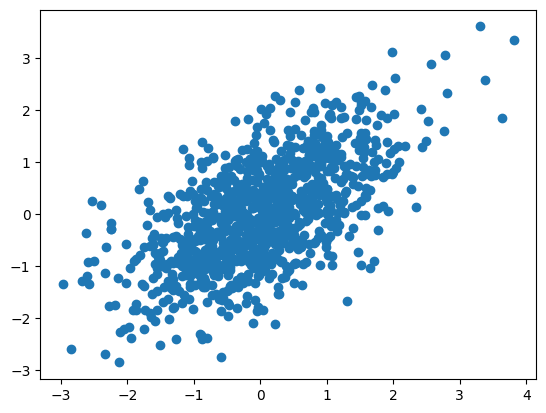

In [8]:
plt.scatter(df['variable_1'],df['variable_2'])

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(df)

StandardScaler()

In [12]:
scaled_data = scaler.transform(df)

In [13]:
pca = PCA(n_components=2)

In [14]:
pca.fit(scaled_data)

PCA(n_components=2)

In [15]:
x_pca = pca.transform(scaled_data)

In [16]:
scaled_data.shape

(1000, 10)

In [17]:
x_pca.shape

(1000, 2)

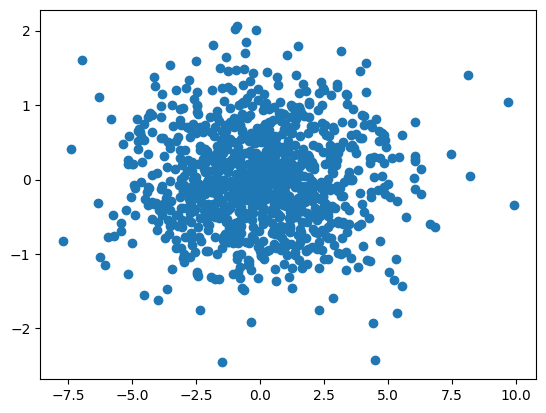

In [18]:
plt.scatter(x_pca[:,0],x_pca[:,1])

In [19]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=500, centers=3, n_features=10, random_state=42)

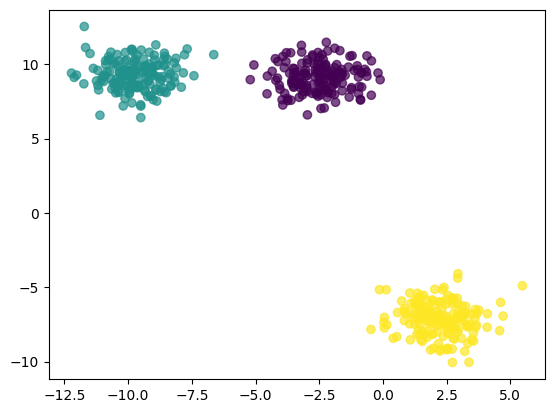

In [20]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=500, centers=3, n_features=10, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.show()

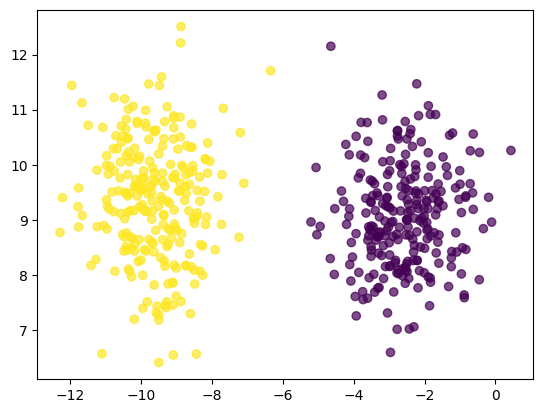

In [21]:
X, y = make_blobs(n_samples=500, centers=2, n_features=10, random_state=42)

X_noisy = X + np.random.normal(scale=0.5, size=X.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.show()

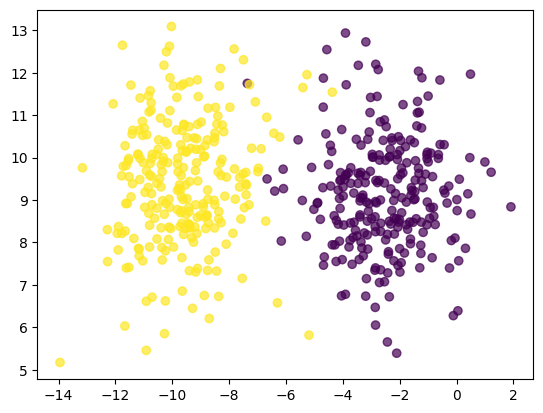

In [22]:
X, y = make_blobs(n_samples=500, centers=2, n_features=10, random_state=42)

X_noisy = X + np.random.normal(scale=1, size=X.shape)

plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.show()

In [23]:
df1 = pd.DataFrame(X,y)

In [40]:
df1

,0,1,2,3,4,5,6,7,8,9
1,-9.503805,10.196192,7.572361,-6.803841,-5.494728,-7.518246,-3.327299,1.114867,-3.272417,-4.082438
1,-8.181375,8.914079,7.604122,-5.791961,-6.971851,-5.739379,-3.505519,0.852101,-1.279821,-4.213310
1,-9.082069,10.845503,7.216956,-6.802873,-5.000938,-4.691295,-0.763098,-0.628365,-1.118218,-6.257516
1,-8.153223,9.050895,8.102128,-5.831448,-8.205398,-5.439842,-4.505047,1.193817,-1.335889,-5.718535
1,-9.056304,9.759858,8.410041,-5.753531,-7.545375,-5.882436,-1.829108,-0.519631,-1.722562,-3.758971
...,...,...,...,...,...,...,...,...,...,...
0,-3.600898,8.627186,5.335417,2.822272,-7.173594,-6.951709,-10.356202,6.966494,2.912683,4.736657
0,-3.869054,9.760540,5.285363,4.136424,-7.187405,-6.660959,-8.588944,8.900976,1.927005,4.440473
0,-3.808779,9.844019,5.451275,0.824906,-6.060850,-5.342178,-9.960873,6.406020,3.039962,4.432947
0,-3.498802,8.888499,4.695604,3.067361,-8.572092,-5.350559,-8.996336,6.896642,1.010196,2.506595


In [41]:
df1.corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,-0.136089,-0.708533,0.930518,-0.207742,-0.184369,-0.887666,0.920649,0.833776,0.936174
1,-0.136089,1.000000,0.119430,-0.150636,0.067919,-0.056272,0.139803,-0.136576,-0.104970,-0.137834
2,-0.708533,0.119430,1.000000,-0.706941,0.076336,0.132878,0.683888,-0.710151,-0.648393,-0.724114
3,0.930518,-0.150636,-0.706941,1.000000,-0.224386,-0.203118,-0.897060,0.938368,0.843541,0.941561
4,-0.207742,0.067919,0.076336,-0.224386,1.000000,0.071568,0.228650,-0.218124,-0.185201,-0.214750
5,-0.184369,-0.056272,0.132878,-0.203118,0.071568,1.000000,0.181391,-0.210032,-0.139264,-0.210430
6,-0.887666,0.139803,0.683888,-0.897060,0.228650,0.181391,1.000000,-0.892642,-0.792748,-0.900678
7,0.920649,-0.136576,-0.710151,0.938368,-0.218124,-0.210032,-0.892642,1.000000,0.820785,0.935677
8,0.833776,-0.104970,-0.648393,0.843541,-0.185201,-0.139264,-0.792748,0.820785,1.000000,0.840928
9,0.936174,-0.137834,-0.724114,0.941561,-0.214750,-0.210430,-0.900678,0.935677,0.840928,1.000000


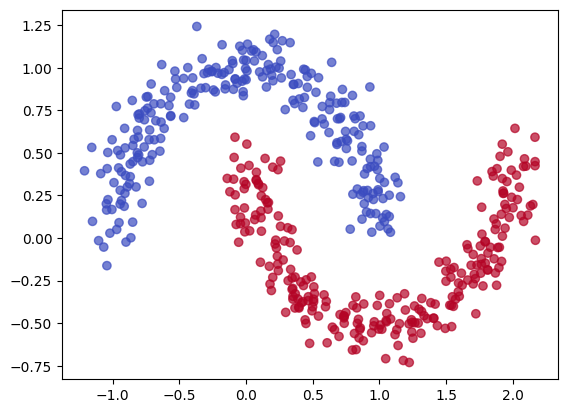

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.show()

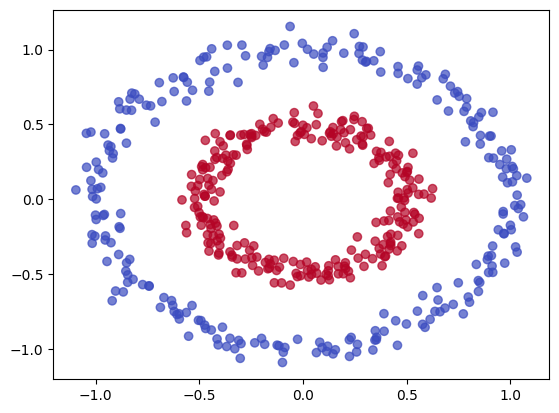

In [26]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.show()


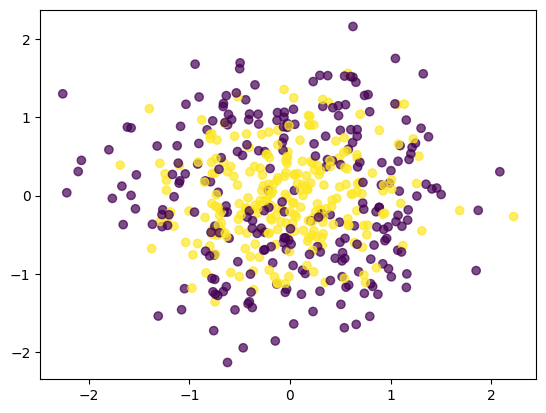

In [27]:
X_noisy = X + np.random.normal(scale=0.5, size=X.shape)

plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.show()

In [28]:
df2 = pd.DataFrame(X_noisy,y)

In [29]:
df2

,0,1
1,-0.295133,0.351780
0,-0.632424,1.275867
1,-1.216495,-0.307118
0,-1.669891,0.121336
0,-0.942243,1.677513
...,...,...
0,-1.525895,0.265358
1,0.666989,0.521009
1,-0.847422,0.172498
1,0.627025,0.020829


In [30]:
scaler = StandardScaler()

In [31]:
df1

,0,1,2,3,4,5,6,7,8,9
1,-9.503805,10.196192,7.572361,-6.803841,-5.494728,-7.518246,-3.327299,1.114867,-3.272417,-4.082438
1,-8.181375,8.914079,7.604122,-5.791961,-6.971851,-5.739379,-3.505519,0.852101,-1.279821,-4.213310
1,-9.082069,10.845503,7.216956,-6.802873,-5.000938,-4.691295,-0.763098,-0.628365,-1.118218,-6.257516
1,-8.153223,9.050895,8.102128,-5.831448,-8.205398,-5.439842,-4.505047,1.193817,-1.335889,-5.718535
1,-9.056304,9.759858,8.410041,-5.753531,-7.545375,-5.882436,-1.829108,-0.519631,-1.722562,-3.758971
...,...,...,...,...,...,...,...,...,...,...
0,-3.600898,8.627186,5.335417,2.822272,-7.173594,-6.951709,-10.356202,6.966494,2.912683,4.736657
0,-3.869054,9.760540,5.285363,4.136424,-7.187405,-6.660959,-8.588944,8.900976,1.927005,4.440473
0,-3.808779,9.844019,5.451275,0.824906,-6.060850,-5.342178,-9.960873,6.406020,3.039962,4.432947
0,-3.498802,8.888499,4.695604,3.067361,-8.572092,-5.350559,-8.996336,6.896642,1.010196,2.506595


In [32]:
scaler.fit(df1)

StandardScaler()

In [33]:
scaled_data = scaler.transform(df1)

In [34]:
pca = PCA(n_components=2)

In [35]:
pca.fit(scaled_data)

PCA(n_components=2)

In [36]:
x_pca = pca.transform(scaled_data)

In [37]:
scaled_data.shape

(500, 10)

In [38]:
x_pca.shape

(500, 2)

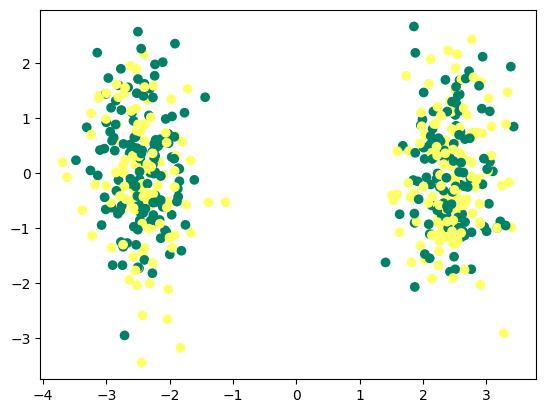

In [39]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,cmap='summer')